# 下载数据并读取

In [10]:
import pandas as pd
data = pd.read_csv("datasets/MNIST/train.csv")

In [11]:
data.shape

(42000, 785)

In [13]:
42000*0.8

33600.0

In [16]:
 data.iloc[1:,:33600]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#我们来创建一下训练集和测试集
X_train,y_train = data.iloc[:33600,1:],data.iloc[:33600,0]
X_test,y_test = data.iloc[33600:,1:],data.iloc[33600:,0]
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((8400, 784), (8400,), (33600, 784), (33600,))

In [28]:
np.random.permutation(7)

array([0, 2, 3, 1, 6, 5, 4])

In [29]:
#打乱一下数据集
import numpy as np
shuffle_index = np.random.permutation(33600)
X_train, y_train = np.array(X_train)[shuffle_index], np.array(y_train)[shuffle_index]

# 类型一：二分类

* 假设现在分类是否为数字5，则分类两类（是5或不是5）。
* 训练一个SGD分类器（随机梯度下降分类器），该分类器是采用了梯度下降方法来求解参数的线性算法集合，默认为线性支持向量机（linear SVM），对大规模的数据处理较快。

In [34]:
#划分数据
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#训练模型
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#交叉验证
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, 
                                 cv=3，method = 'predict')#交叉验证k=3,method默认为predict
# 输出分类结果
y_train_pred

array([False, False, False, ..., False, False, False])

## 评价标准
* 与回归问题计算损失函数不同，二分类特有的一种评价指标为查准率和查全率（Precision and Recall）以及F1指标。
* Precision就是预测为正类的样本有多少比例的样本是真的正类，TP/(TP+FP)；Recall就是所有真正的正类样本有多少比例被预测为正类，TP/（TP+FN）。其中TP为真正类被预测为正类，FP为负类被预测为正类，FN为真正类被预测为负类。
* F1指标就是结合两者，求调和平均，强调了查准率和查全率是同等重要的。但是现实问题不一定是同等重要的。比如推荐电影，给观众推荐一部很好的电影比很多电影更重要，因此Precision更加重要；而对于检查安全问题，宁可多次去核查也不能出现一点错误，因此Recall更重要。所以对于实际问题，应该适当权衡Precision和Recall。

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.787719298245614
0.7365485564304461
0.7612750084774499


## 决策函数和阈值

* 对于precision和recall的权衡，我们可以通过decision function()来获得得分情况，从而确定阈值（threshold），进行0和1的判断。
* 得分大于threshold的为1(positive)，即TP+FP；得分大于threshold的为0(negative),即TN+FN。
* scikit-learn中提供函数precision_recall_curve()来帮助我们确定阈值。

In [44]:
#计算得分
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")# method选择decision function

#调用precision_recall_curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions.shape, recalls.shape, thresholds.shape

((33589,), (33589,), (33588,))

* 得出的结果precisions和recalls的元素个数比threholds多一个，因此画图时需要回退一个。

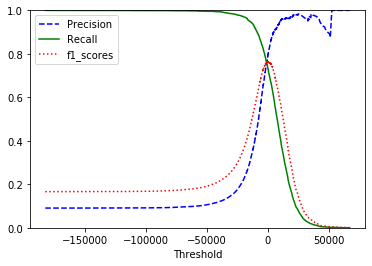

In [54]:
import matplotlib.pyplot as plt

# 计算f1_score
f1_scores = 2 * np.multiply(precisions,recalls)/(precisions + recalls)

# x轴设为threshold，y轴为precision、recall、f1_score
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, f1_scores[:-1], "r:", label="f1_scores")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

从中可以看出来：
* 当阈值较小时，大部分输出都会被分为1（positive），这时查准率很低，查全率很高。
* 当阈值 = 0时，f1score达到最高，这也是为什么我们默认把阈值设为0的原因。
* 当阈值较大时，只有小部分输出会被分为1（positive），这时查准率很高，但查全率很低。

# 类别二：多分类

对于多分类问题，多分类器和扩展的二分类器都能计算。
* 多分类器：随机森林(Random Forest)、朴素贝叶斯(naive Bayes)
* 二分类器扩展：支持向量机（SVM）、线性分类器(Linear classifiers)

## OVA &OVO
将二分类器进行扩展一般有两种方法：
* OVA(one-versus-all)：比如分类数字（0-9），则训练10个分类器（是否为0的分类器，…，是否为9的分类器），每一个分类器最后会算出一个得分，判定为最高分的那一类。
* OVO(one-versus-one)：每个类之间训练一个分类器（比如0和1训练一个分类器，1-3训练一个分类器），总共有N*(N-1)/2个分类器，哪个类得分最高判定为那一类。
* 一般情况下，OVO训练速度比较快（因为训练多个小分类器比训练一个大分类器时间要快），而OVA的表现会更好，因此Sklearn中二分类器进行多分类默认为OVA，除了SVM使用OVO以外（SVM对大规模的数据表现不好）

In [58]:
# 二分类器SGD分类器扩展的例子
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# 从中随便取个数看看情况
some_digit = X_train[30000]
sgd_clf.predict([some_digit])
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-91487.61910092, -51856.57424   ,  13572.82759547,
         -2448.91950822, -73806.83343257, -21856.27100973,
        -14561.57220346, -70072.64416656,  -6056.62056316,
        -43155.18519568]])

* 可以看到第6个分数（代表数字5）最高，即分类为数字5。

## 评价分类器的好坏

* 对于回归任务，我们用的是交叉验证法，误差标准是根均方误差（SME）
* 对于分类任务，同样也可以采取交叉验证法，评价标准除了上文提到的precision、recall和f1score，还可以为准确率（accuray）或者交叉熵（cross entropy）。

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 先做一下特征缩放
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90859591, 0.90391999, 0.90623326])

* 矩阵数据太多太复杂，我们用图表来直观表示一下。

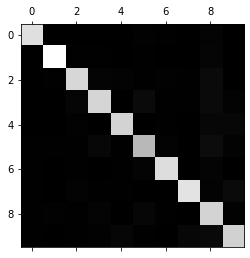

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

* 从图中可以看到分类结果表现的还好，数字5比较暗，说明数字5被错分的比较多。
* 我们还可以取出正确的对角线分布情况，只看错误的分布

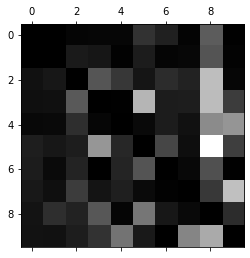

In [63]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums.astype(np.float64)
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* 可以看到第6行第9列比较白，说明5错分为9的次数比较多。因此还可以把错误的样本提取出来观察分析，从而改进算法。

# 类别三：多标签分类
* 对一个数据输入多个二值分类标签就是多标签分类（Multilabel Classification），比如人脸识别分类器，如果一张图片上有多个人脸，那就不能只识别一个人，而是要识别出多个人。

In [64]:
# 我们利用k近邻分类器做个例子
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7) # 分类1：y是否大于等于7
y_train_odd = (y_train % 2 == 1) # 分类2：y是否为偶数
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False, False]])

* 评价多标签分类模型的方法可以对每种标签求F1值，再求平均值。

# 类别四：多输出分类
* 多输出分类（Multioutput Classification ）是多标签分类的泛化，每个标签可能有多个值。
* 比如现在图像有噪声，需要将每个像素分类为0或1已达到去噪的目的。

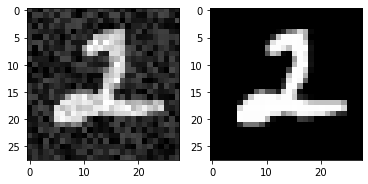

In [65]:
#生成左边的噪声图
import numpy.random as rnd
noise1 = rnd.randint(0, 100, (len(X_train), 784))

# 建立有噪声的训练集
X_train_mod = X_train + noise1
y_train_mod = X_train

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(X_train_mod[30000].reshape(28,28),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(X_train[30000].reshape(28,28),cmap=plt.cm.gray)

* 接下来训练一个KNN模型实现多输出分类（去噪）

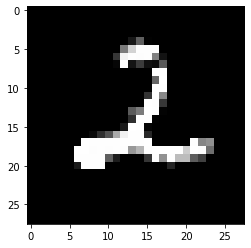

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_train_mod[30000]])
plt.imshow(clean_digit.reshape(28,28),cmap=plt.cm.gray)

# 错误分析
我们可以通过混淆矩阵进行错误分析。

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[3133,    0,    4,    5,    5,   37,   24,    3,   68,    1],
       [   0, 3582,   22,   19,    2,   24,    5,    6,   71,    3],
       [  13,   18, 3013,   65,   42,   16,   34,   26,  144,    5],
       [  12,   13,   70, 2993,    1,  141,   22,   23,  147,   47],
       [   6,    7,   34,    5, 2957,    7,   21,   13,  102,  109],
       [  21,   16,   20,  103,   27, 2585,   48,   10,  175,   43],
       [  21,    8,   26,    0,   27,   63, 3094,    6,   60,    1],
       [  19,   12,   48,   16,   25,    8,    2, 3190,   45,  152],
       [  14,   34,   25,   64,    4,   87,   17,    7, 2976,   33],
       [  14,   13,   22,   38,   87,   19,    0,  100,  128, 2927]],
      dtype=int64)